In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("C:/Users/izzaa/Downloads/archive(9)/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','waterfront','view'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1800,7503


In [6]:
df['price_per_sqftliving']=df['price']/df['sqft_living']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price_per_sqftliving
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1800,7503,303.571429


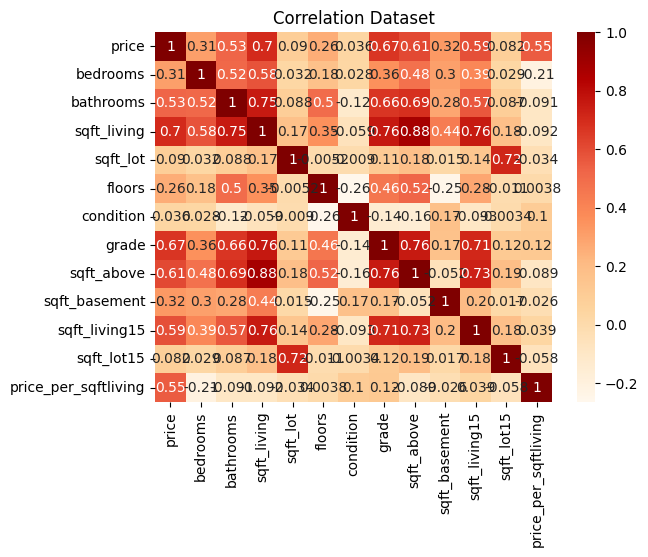

In [8]:
import seaborn as sns
corr = df.select_dtypes(include=['int', 'float']).corr()
sns.heatmap(corr, cmap = 'OrRd', annot= True).set_title('Correlation Dataset');

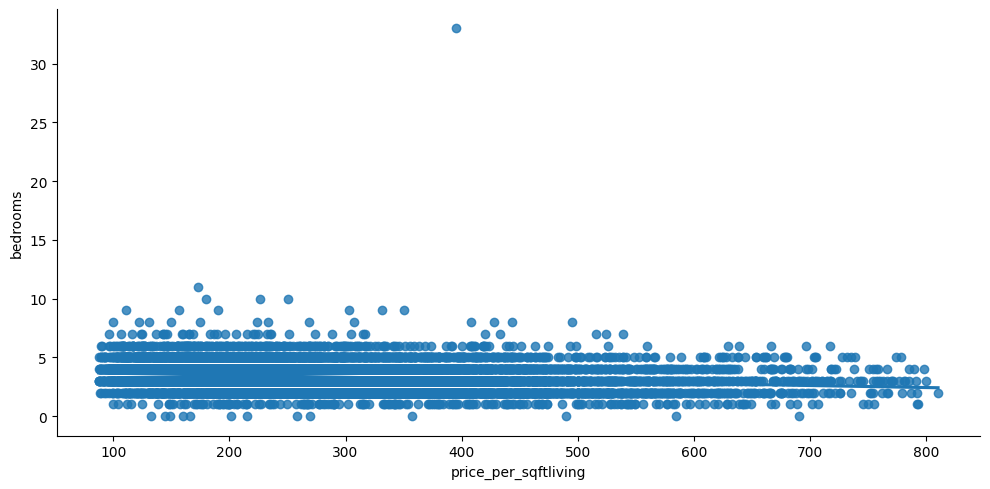

In [9]:
sns.lmplot(x='price_per_sqftliving',y='bedrooms',data=df,aspect=2,height=5)
plt.xlabel('price_per_sqftliving')
plt.ylabel('bedrooms');

In [33]:
from sklearn.preprocessing import (
    MinMaxScaler,
    Normalizer,
    StandardScaler,
    minmax_scale,
)



x = df.drop('price', axis=1) 
y = df['price']



In [49]:
scaler: StandardScaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [37]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [50]:

x


array([[0.09090909, 0.125     , 0.06716981, ..., 0.16193426, 0.00574235,
        0.13903885],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.22216486, 0.00802712,
        0.16850069],
       [0.06060606, 0.125     , 0.03622642, ..., 0.3994149 , 0.00851302,
        0.20230831],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.10686629, 0.00155764,
        0.42436946],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.17398038, 0.00073057,
        0.22477561],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.10686629, 0.00081098,
        0.31975504]])

In [39]:
y

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


linear_model = LinearRegression()


linear_model.fit(x_train, y_train)


y_preds = linear_model.predict(x_test)


In [65]:
Accuracy=r2_score(y_test,y_preds)

In [66]:
Accuracy

0.8783108955291948